## Copy it from plot_sigma_alpha_specz_cross_photoz.ipynb, modify it to plot sigma_DA and sigma_Hz in the same figure. --03-21-2023

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os, sys
from pathlib import Path

In [3]:
sys.path.append("/home/zjding/csst_bao/fisher_pkmu/")
from mcmc_funs import growth_factor
from astropy.table import Table

In [4]:
speed_c = 299792.458    # speed of light, km/s
Omega_m = 0.3075

##Pspecz_sys = "5.e3"
Pspecz_sys = "1.0"

with_recon = True
##with_recon = False

if with_recon == True:
    recon_dir = "post_recon/"
    fig_text = "Post-recon"
else:
    recon_dir = "pre_recon/"
    fig_text = "Pre-recon"

survey_area = 17500.0
kmax = 0.3
kwidth = 0.005
zmin = 0.
zmax = 1.6
nzbins = 8
zbins = np.linspace(zmin, zmax, nzbins+1)

const_low = 0.99
const_up = 1.01

skyarea_total = 4*np.pi * (180./np.pi)**2.0
fsky = survey_area/skyarea_total
G_0 = growth_factor(0.0, Omega_m)       # G_0 at z=0, normalization factor 

# ## estimate the power spectrum damping parameter $\Sigma_{specz}$, $\Sigma_{pz}$ from the spec-z and photo-z uncertainty
sigma_specz = 0.002
#sigma_photoz = 0.05
sigma_photoz = 0.025
# Finger-of-God damping term
Sigma_fog = 7.0 

fsky_cosmos = 2.0/skyarea_total
fsky_zcosmos = 1.7/skyarea_total

In [5]:
##idir0 = "/home/zjding/csst_bao/fisher_pkmu/BAO_part/Fisher_sigma_alphas/numerical_method/secondgen/"
idir0 = "/home/zjding/csst_bao/fisher_pkmu/BAO_part/Fisher_sigma_alphas/numerical_method/default/output/"

In [6]:
recon_dir_list = ["pre_recon", "post_recon"]
text_list = ["Pre-recon", "Post-recon"]
tracer_list = ['photoz', 'specz', 'specz_add_cross', 'specz_photoz_add_cross']
label_list = ['photo-z', 'spec-z', 'spec-z+cross', 'spec-z+cross+photo-z']
line_list = ['--', ':', '-.', '-']
marker_list = ['x', 's', '>', 'o']


if Sigma_fog > 0.0:
    params_str_list = ['11101010101010', '11110101010101', '11111111111111', '11111111111111']

In [7]:
alpha_perp_all = []
alpha_para_all = []

for recon_dir in recon_dir_list:
    alpha_perp_list = []
    alpha_para_list = []
    for i, tracer in enumerate(tracer_list):
        tracer, params_str = tracer_list[i], params_str_list[i]
        alpha_dir = idir0 + f"sigma_alpha/vary_params_{const_low}_{const_up}/Sigma_fog_{Sigma_fog}/{recon_dir}/k_width{kwidth}/Pspecz_sys{Pspecz_sys}/params_bf1.0/"
        
        filename = "sigma_alpha_{0}_tracer_zerror_specz{1:.3f}_photoz{2:.3f}_kmax{3:.2f}_params{4}.npz".format(tracer, sigma_specz, sigma_photoz, kmax, params_str)

        alpha_dir_temp = alpha_dir
        ifile = Path(alpha_dir, filename)
        data = np.load(ifile)
        alphas_mar = data['alphas_mar']

        alpha_perp_list.append(alphas_mar[:, 2])
        alpha_para_list.append(alphas_mar[:, 3])

    alpha_perp_all.append(alpha_perp_list)
    alpha_para_all.append(alpha_para_list)

In [8]:
alphas_mar

array([[ 0.        ,  0.2       ,  0.00915309,  0.04492757, -0.1961927 ],
       [ 0.2       ,  0.4       ,  0.00656491,  0.01917479, -0.31424823],
       [ 0.4       ,  0.6       ,  0.00637243,  0.01478807, -0.39936404],
       [ 0.6       ,  0.8       ,  0.00529209,  0.01199202, -0.40607306],
       [ 0.8       ,  1.        ,  0.00520668,  0.01187719, -0.39774926],
       [ 1.        ,  1.2       ,  0.00714784,  0.02191654, -0.2828575 ],
       [ 1.2       ,  1.4       ,  0.00805837,  0.07454696, -0.16727876],
       [ 1.4       ,  1.6       ,  0.00808652,  0.22875512, -0.29156154]])

In [9]:
z_mid = (alphas_mar[:, 0] + alphas_mar[:, 1])/2.0
z_mid

array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5])

In [10]:
odir = "./figs/z{0:.1f}_{1:.1f}_{2}zbins/".format(zmin, zmax, nzbins)
if not os.path.exists(odir):
    os.makedirs(odir)

## for $\sigma (\alpha_{\perp})$ and $\sigma (\alpha_{\parallel})$

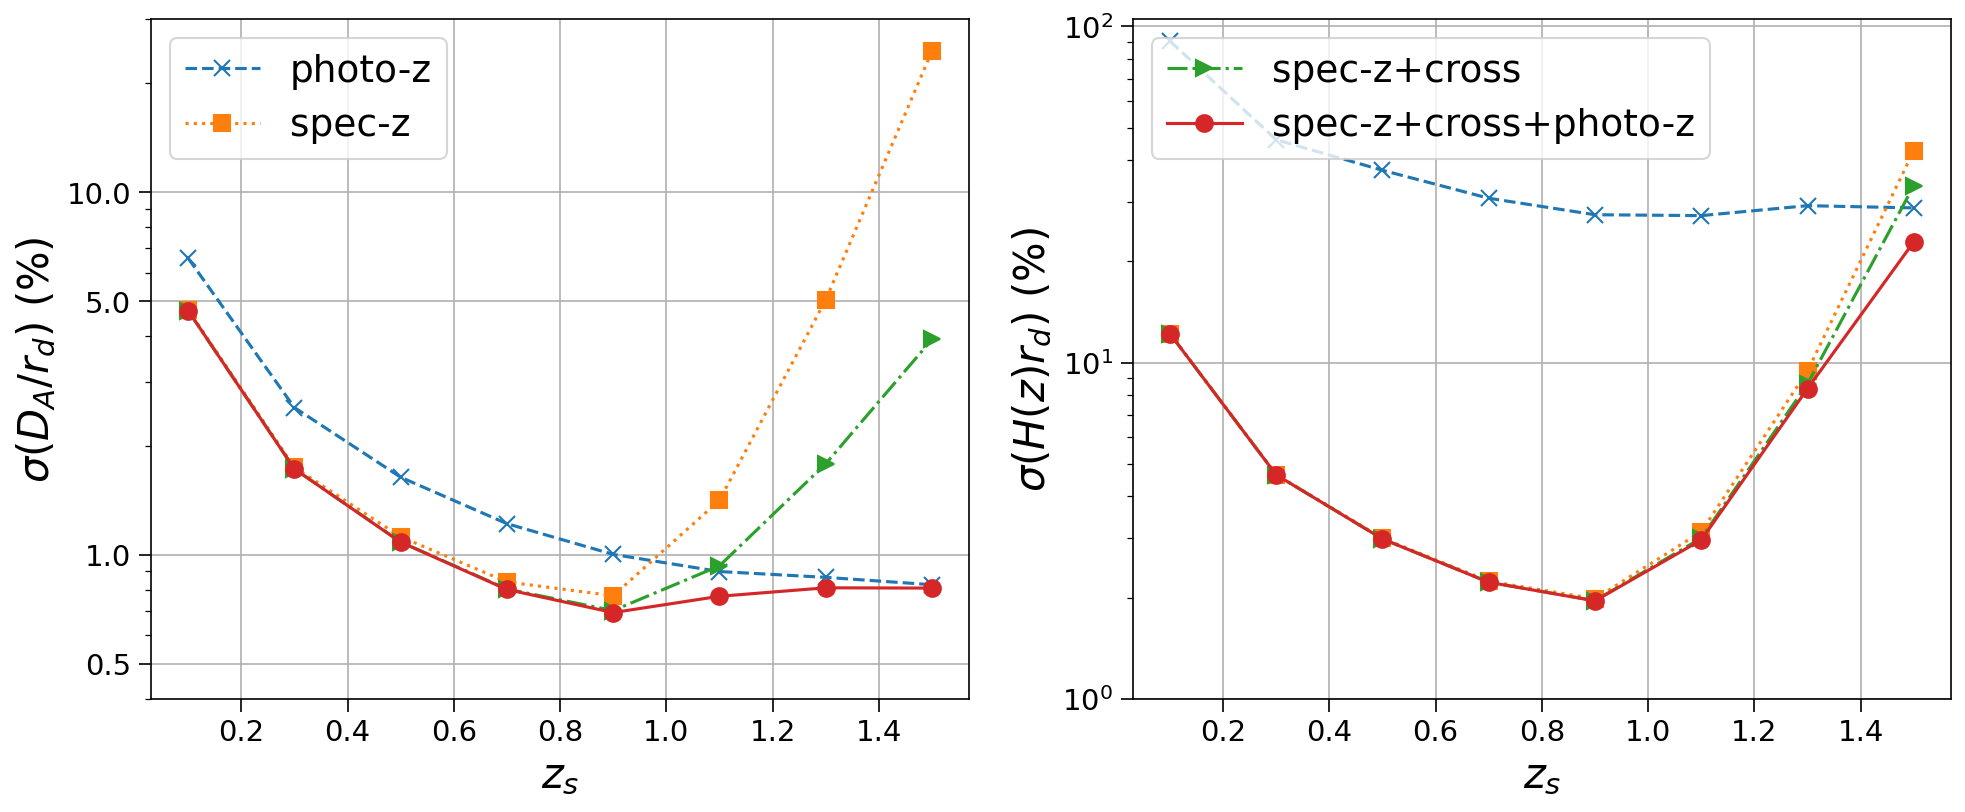

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), dpi=150)
plt.subplots_adjust(
    left=0.15,
    bottom=None,
    right=None,
    top=None,
    wspace=0.2,
    hspace=None,
)
# both panels plot pre-recon result
for ii, alpha_perp in enumerate(alpha_perp_all[0]):
    axes[0].plot(z_mid, 100*alpha_perp, ls=line_list[ii], marker=marker_list[ii], ms=8.0, color='C{0}'.format(ii), label=label_list[ii] if ii<2 else None)

for ii, alpha_para in enumerate(alpha_para_all[0]):
    axes[1].plot(z_mid, 100*alpha_para, ls=line_list[ii], marker=marker_list[ii], ms=8.0, color='C{0}'.format(ii), label=label_list[ii] if ii>=2 else None)

for j in range(2):
    axes[j].grid()
    axes[j].set_xlabel(r"$z_s$", fontsize=20)
    axes[j].legend(fontsize=18, loc='upper left')
    
axes[0].set_yscale("log")
#axes[0].set_ylabel(r"$\sigma_{D_\mathrm{A}/r_{\mathrm{s}}}$ (%)", fontsize=20)
axes[0].set_ylabel(r"$\sigma (D_A/r_d)$ (%)", fontsize=20)
axes[0].set_ylim([0.4, 30.0])
axes[0].set_yticks([0.5, 1.0, 5.0, 10.0])
axes[0].set_yticklabels(['0.5', '1.0', '5.0', '10.0'])

axes[1].set_yscale("log")
axes[1].set_ylim([1.0, 105.0])
#axes[0].set_ylabel(r"$\sigma_{D_\mathrm{A}/r_{\mathrm{s}}}$ (%)", fontsize=20)
axes[1].set_ylabel(r"$\sigma (H(z) r_d)$ (%)", fontsize=20)

for i in range(2):
    axes[i].tick_params(axis='both', which='major', length=6, labelsize=14)
    axes[i].tick_params(axis='both', which='minor', length=3, labelsize=12)
        
#plt.tight_layout()

filename = "sigma_DA_Hz_sigmafog{0:.1f}_sureveyarea{1}_specz{2:.3f}_photoz{3:.3f}_kmax{4:.2f}_params{5}_Pspeczsys{6}.png".format(Sigma_fog, int(survey_area), sigma_specz, sigma_photoz, kmax, params_str_list[-1], Pspecz_sys)
ofile = odir + filename
plt.savefig(ofile)